1
Generated  122  potential Fourier coefficients
 with phases uniformly distributed between 0 and  3.14159265359
Built potential grid, with dimensions 

beatbox/universe.py:546: RuntimeWarning: divide by zero encountered in power
  self.Power_Spectrum = self.PSnorm*1000*np.power((self.k/self.kstar) ,(-3+(self.n_s-1)))
beatbox/multiverse.py:331: RuntimeWarning: covariance is not positive-semidefinite.
  noise = np.random.multivariate_normal(mean, self.C_yy, 1)


 (41, 41, 41)  and mean value  0.0 +/- 0.0002173
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 

beatbox/universe.py:383: ComplexWarning: Casting complex values to real discards the imaginary part
  ay_real[zero_ind] = value[zero_ind].astype(np.float)
beatbox/multiverse.py:286: ComplexWarning: Casting complex values to real discards the imaginary part
  R_real[zero_ind,:] = beatbox.Universe.R[zero_ind,:].astype(np.float)



-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin
Sigma is 0.000000 arcmin (0.000000 rad) 
-> fwhm is 0.000000 arcmin


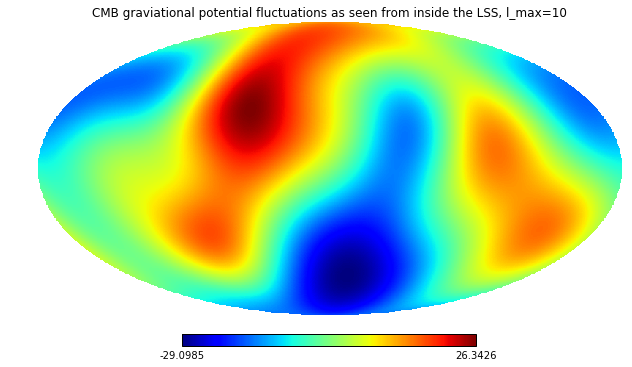

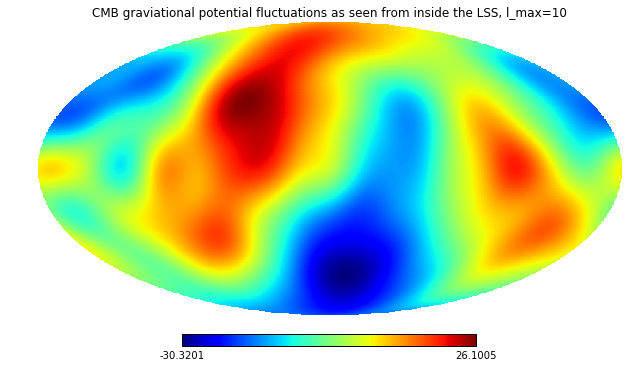

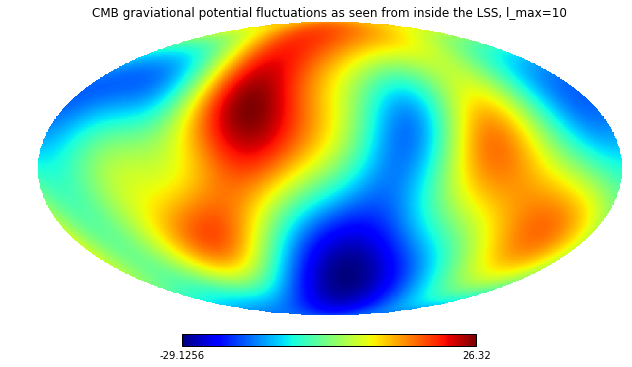

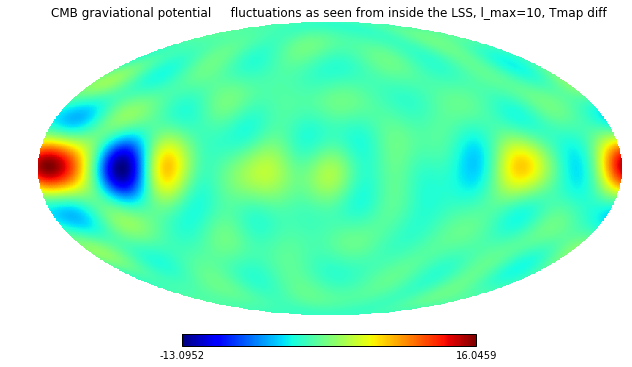

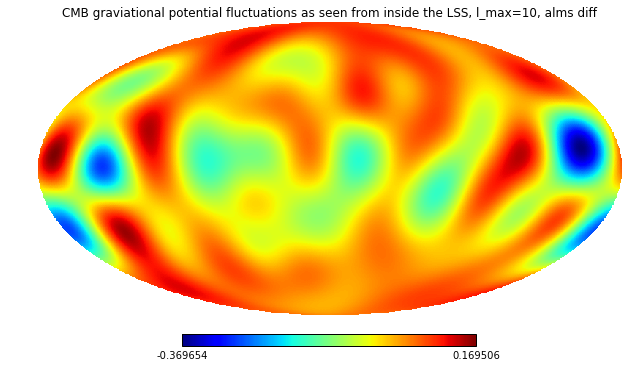

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

MOCK = 1
execfile ("_ReconstructionScript.py")

In [ ]:

import matplotlib.pyplot as plt
plt.plot(np.arange(len(beatbox.You.all_simulated_universes[-1].ay)) , beatbox.You.all_simulated_universes[-1].ay , 'ro', np.arange(len(We.ay)),We.ay , 'g^', np.arange(len(MockUniverse.ay)),MockUniverse.ay , 'b^')
plt.axis([0 , 120, -15,15])
plt.show()


In [ ]:
import matplotlib.pyplot as plt
imgplot = plt.imshow(beatbox.You.C_yy)

In [ ]:
beatbox.You.all_simulated_universes[0].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
numreal=1000
#beatbox.You.all_simulated_universes = np.append(beatbox.You.all_simulated_universes, [beatbox.Universe() for i in range(numreal)])
beatbox.You.all_reconstructed_universes = np.append(beatbox.You.all_reconstructed_universes, [beatbox.Universe() for i in range(numreal)])

for i in range(numreal):
    # First, generate one realization of noise
    noise = beatbox.You.generate_one_realization_of_noise()
    # Add the noise to the initial realization of the sky map
    datamap = beatbox.You.all_simulated_universes[0].ay2ayreal_for_inference(beatbox.You.all_simulated_universes[0].ay)+noise
    datamap = datamap.T
    
    # Reconstruct the fn's
    beatbox.You.solve_for_3D_potential(datamap)
    beatbox.You.all_reconstructed_universes[i].fn=beatbox.You.reconstrunct_fn
    beatbox.You.all_reconstructed_universes[i].transform_3D_potential_into_alm(usedefault=1, fn=1)
    #beatbox.You.all_reconstructed_universes[i].show_CMB_T_map(from_perspective_of="observer")
    



In [ ]:
n = 30
smarts=np.zeros(numreal)
for i in range(numreal):
    smarts[i] = beatbox.You.all_reconstructed_universes[i].fn[n] 
print smarts[:].shape

In [ ]:
nbins, bins, patches = plt.hist(smarts, 100, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[n])

#plt.axvline(We.fn[5])

plt.show()

In [ ]:
beatbox.You.all_reconstructed_universes[i].ay[1][0]

In [ ]:
ay74=np.zeros(numreal)
for i in range(numreal):
    ay74[i] = beatbox.You.all_reconstructed_universes[i].ay[74][0]


n, bins, patches = plt.hist(ay74, 40, normed=1, facecolor='yellow', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].ay[74])

#plt.axvline(We.ay[5])

plt.show()



In [ ]:
beatbox.You.generate_realizations_from_posterior(We.fn, number_of_realizations=1000)


In [ ]:
for k in range(10):
    beatbox.You.all_simulated_universes[-1-k].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
#for k in range(10):
#    beatbox.You.all_simulated_universes[-1-k].show_CMB_T_map(from_perspective_of="observer")
post106=np.zeros(1000)
for i in range(1000):
    post106[i] = beatbox.You.all_simulated_universes[-1-i].fn[106] 

In [ ]:
n, bins, patches = plt.hist(post106, 20, normed=1, facecolor='green', alpha=0.75)

plt.xlabel('Smarts')
#plt.ylabel('Probability')
#plt.title(r'$\mathrm{Histogram\ of\ IQ:}\ \mu=100,\ \sigma=15$')
#plt.axis([40, 160, 0, 0.03])
plt.grid(True)

plt.axvline(beatbox.You.all_simulated_universes[0].fn[106])

#plt.axvline(We.fn[5])

plt.show()

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0001_k00030.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0002_k00030.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")

In [ ]:
beatbox.You.all_data_universes = np.append(beatbox.You.all_data_universes, beatbox.Universe())
beatbox.You.all_data_universes[-1].read_in_CMB_T_map(from_this='data/commander_32band_Clsamples100/cmb_Cl_c0001_k00031.fits')
beatbox.You.all_data_universes[-1].decompose_T_map_into_spherical_harmonics()
beatbox.You.all_data_universes[-1].alm2ay()
beatbox.You.all_data_universes[-1].ay2alm(beatbox.You.all_data_universes[-1].ay)
beatbox.You.all_data_universes[-1].show_CMB_T_map(from_perspective_of="observer")


In [ ]:
beatbox.You.all_reconstructed_universes[i].fn


In [ ]:
mean=np.zeros(self.C_yy.shape[0])
noise = np.random.multivariate_normal(mean, self.C_yy, 1)

In [ ]:
import matplotlib.pyplot as plt
plt.plot(np.arange(len(datamap)) , datamap , 'ro', np.arange(len(noise[0])),noise[0], 'g^', np.arange(len(MockUniverse.ay)),(MockUniverse.ay) , 'b^', np.arange(len(ay)),ay , 'k^')
plt.axis([0 , 70, -10,10])
plt.show()

In [ ]:
 #Select the m values out the the lms tupples
m = np.array([m[1] for m in beatbox.Universe.lms])
        #Find the indices of the positive ms
pos_ind = (m>0)
        #Find the indices of the m=0
zero_ind = (m==0)
        #Find the indices of the negative ms
neg_ind = (m<0)
        
ay = np.zeros(len(beatbox.Universe.lms), dtype=np.complex128)
        
ay[pos_ind] = datamap[pos_ind].real+1j*datamap[neg_ind]
ay[neg_ind] = ((datamap[pos_ind].T-1j*datamap[neg_ind].T) * (-1)**m[neg_ind]).T
ay[zero_ind] = datamap[zero_ind]
        

In [ ]:
print MockUniverse.ay

In [ ]:
ay

In [ ]:
datamap[pos_ind].shape

In [ ]:
datamap[pos_ind].real+1j*datamap[neg_ind]

In [ ]:
print np.std(We.Tmap)


In [ ]:
We.alm